# Project description
You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:
- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

# Data description
- `id` — unique oil well identifier
- `f0`, `f1`, `f2` — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- `product` — volume of reserves in the oil well (thousand barrels)

# Project Implementation

## Importing libraries, opening and analyzing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats as st
import numpy as np
import warnings
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
try:
    geo_data_0 = pd.read_csv('datasets/geo_data_0.csv')
    display(geo_data_0.head(3))
    geo_data_1 = pd.read_csv('datasets/geo_data_1.csv')
    display(geo_data_0.head(3))
    geo_data_2 = pd.read_csv('datasets/geo_data_2.csv')
    display(geo_data_0.head(3))
except:
    print("Files' paths are not correct!")

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


In [3]:
print('"geo_data_0" info:\n')
display(geo_data_0.info())
print('=' * 50)
print('"geo_data_1" info:\n')
display(geo_data_1.info())
print('=' * 50)
print('"geo_data_2" info:\n')
display(geo_data_2.info())

"geo_data_0" info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

"geo_data_1" info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

"geo_data_2" info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [4]:
data_list = [geo_data_0, geo_data_1, geo_data_2]

In [5]:
for i, dataset in enumerate(data_list):
    print(f'Region {i}. Number of non-unique IDs: {dataset.id.count()-dataset.id.nunique()}\n')
    print(f'Region {i}. Oil wells which presented in the dataframe more than one time :\n{dataset.id.value_counts().head()}')
    print('\n')

Region 0. Number of non-unique IDs: 10

Region 0. Oil wells which presented in the dataframe more than one time :
fiKDv    2
QcMuo    2
AGS9W    2
Tdehs    2
74z30    2
Name: id, dtype: int64


Region 1. Number of non-unique IDs: 4

Region 1. Oil wells which presented in the dataframe more than one time :
wt4Uk    2
LHZR0    2
5ltQ6    2
bfPNe    2
kBEdx    1
Name: id, dtype: int64


Region 2. Number of non-unique IDs: 4

Region 2. Oil wells which presented in the dataframe more than one time :
VF7Jo    2
KUPhW    2
xCHr8    2
Vcm5J    2
fwXo0    1
Name: id, dtype: int64




In [6]:
# Let's round the product values - nobody cares about all that fractions of oil
# Furthermore, let's change the float64 to float32 dtype to save memory
# Later, let's drom the column 'id' since it is useless in the ML process
# Finally, let's calculate the number of duplicates

for i, dataset in enumerate(data_list):
    dataset[['f0', 'f1', 'f2']] = dataset[['f0', 'f1', 'f2']].astype('float32')
    dataset['product'] = dataset['product'].astype('int16')
    dataset.drop('id', axis=1, inplace=True)
    print(f'Region {i} has: {dataset.duplicated().sum()} duplicates')

Region 0 has: 0 duplicates
Region 1 has: 0 duplicates
Region 2 has: 0 duplicates


### `geo_data_0` dataset

In [7]:
geo_data_0.head()

,f0,f1,f2,product
0,0.705745,-0.497822,1.221170,105
1,1.334711,-0.340164,4.365080,73
2,1.022732,0.151990,1.419926,85
3,-0.032172,0.139033,2.978566,168
4,1.988431,0.155413,4.751769,154


In [8]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float32
 1   f1       100000 non-null  float32
 2   f2       100000 non-null  float32
 3   product  100000 non-null  int16  
dtypes: float32(3), int16(1)
memory usage: 1.3 MB


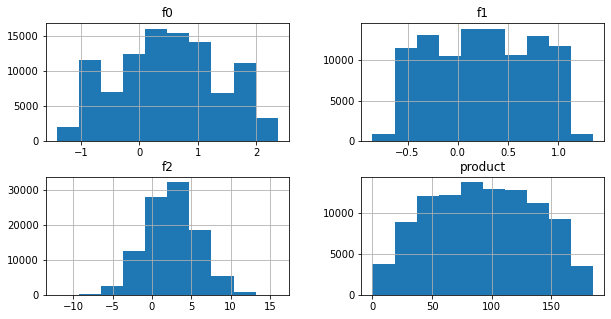

In [9]:
geo_data_0.hist(figsize=(10, 5))
plt.show()

Some oil wells are presented two times. Most probably, they have been tested several times for their parameters and oil reserves amount. Let's leave the data as it is.

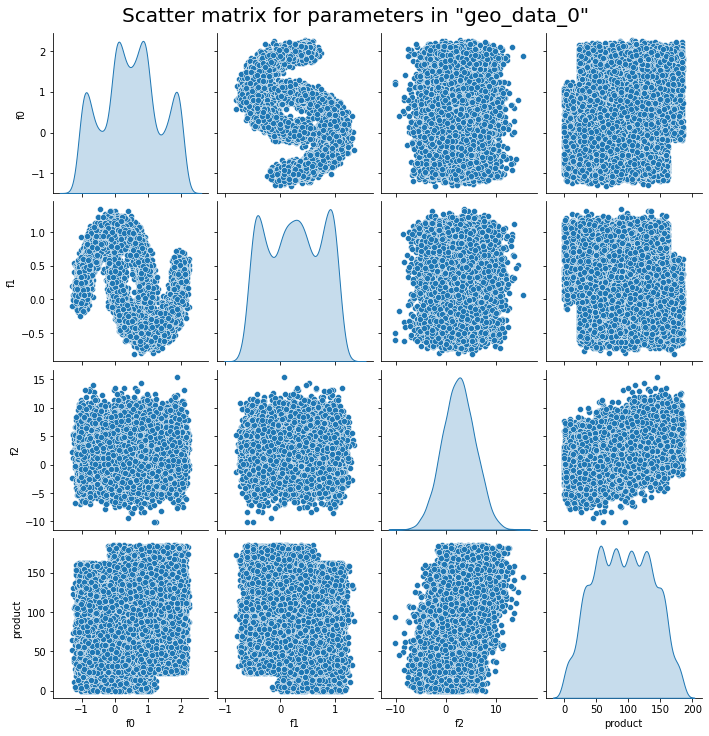

In [10]:
# visualize distribution and interaction of columns in each dataframe
# data is too big, to save computational time, get only small fraction of the data
sns.pairplot(geo_data_0.sample(frac=0.2), diag_kind='kde')
plt.suptitle('Scatter matrix for parameters in "geo_data_0"', fontsize=20, y=1.02)
plt.show()

In [11]:
geo_data_0.corr().round(2).style.background_gradient()

,f0,f1,f2,product
f0,1.000000,-0.440000,-0.000000,0.140000
f1,-0.440000,1.000000,0.000000,-0.190000
f2,-0.000000,0.000000,1.000000,0.480000
product,0.140000,-0.190000,0.480000,1.000000


### `geo_data_1` dataset

In [12]:
geo_data_1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3
1,14.272088,-3.475083,0.999183,26
2,6.263187,-5.948386,5.001160,134
3,-13.081196,-11.506057,4.999415,137
4,12.702195,-8.147433,5.004363,134


In [13]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float32
 1   f1       100000 non-null  float32
 2   f2       100000 non-null  float32
 3   product  100000 non-null  int16  
dtypes: float32(3), int16(1)
memory usage: 1.3 MB


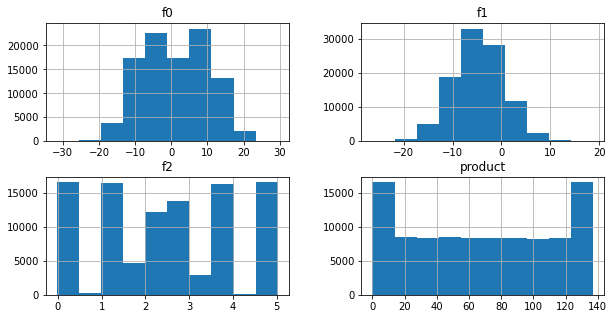

In [14]:
geo_data_1.hist(figsize=(10, 5))
plt.show()

Some oil wells are presented two times. Most probably, they have been tested several times for their parameters and oil reserves amount. Let's leave the data as it is.

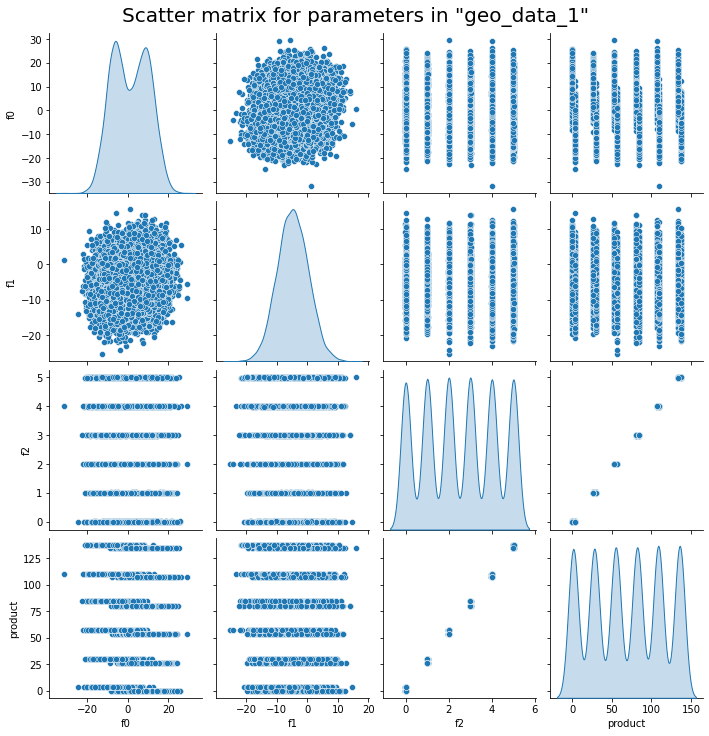

In [15]:
# visualize distribution and interaction of columns in each dataframe
# data is too big, to save computational time, get only small fraction of the data
sns.pairplot(geo_data_1.sample(frac=0.2), diag_kind='kde')
plt.suptitle('Scatter matrix for parameters in "geo_data_1"', fontsize=20, y=1.02)
plt.show()

In [16]:
geo_data_1.corr().round(2).style.background_gradient()

,f0,f1,f2,product
f0,1.000000,0.180000,-0.000000,-0.030000
f1,0.180000,1.000000,-0.000000,-0.010000
f2,-0.000000,-0.000000,1.000000,1.000000
product,-0.030000,-0.010000,1.000000,1.000000


### `geo_data_2` dataset

In [17]:
geo_data_2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27
1,0.262778,0.269839,-2.530186,56
2,0.194587,0.289035,-5.586433,62
3,2.236060,-0.553760,0.930038,114
4,-0.515993,1.716266,5.899012,149


In [18]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float32
 1   f1       100000 non-null  float32
 2   f2       100000 non-null  float32
 3   product  100000 non-null  int16  
dtypes: float32(3), int16(1)
memory usage: 1.3 MB


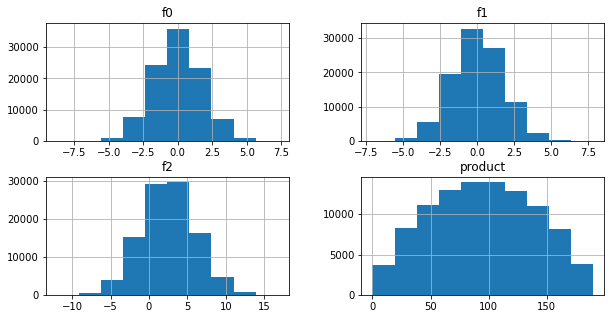

In [19]:
geo_data_2.hist(figsize=(10, 5))
plt.show()

Some oil wells are presented two times. Most probably, they have been tested several times for their parameters and oil reserves amount. Let's leave the data as it is.

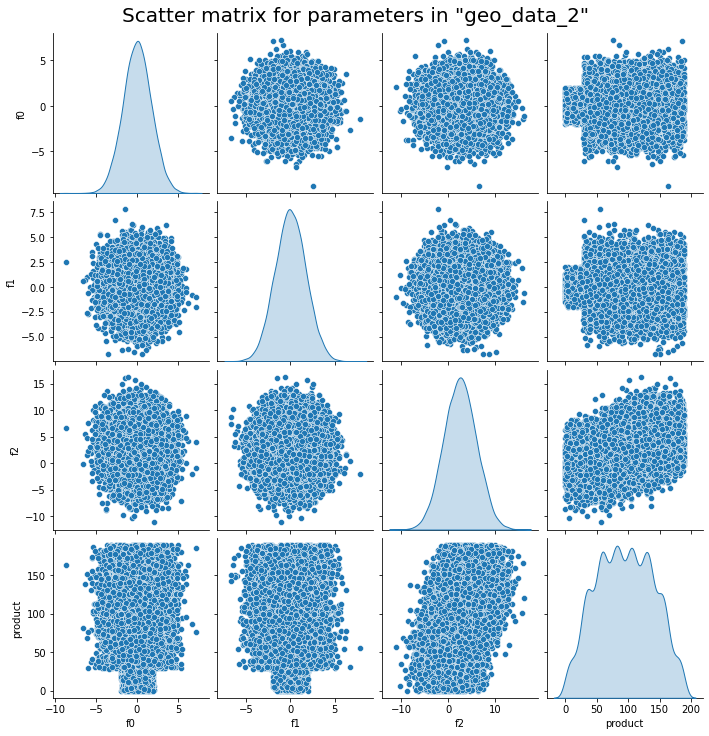

In [20]:
# visualize distribution and interaction of columns in each dataframe
# data is too big, to save computational time, get only small fraction of the data
sns.pairplot(geo_data_2.sample(frac=0.2), diag_kind='kde')
plt.suptitle('Scatter matrix for parameters in "geo_data_2"', fontsize=20, y=1.02)
plt.show()

In [21]:
geo_data_2.corr().round(2).style.background_gradient()

,f0,f1,f2,product
f0,1.000000,0.000000,-0.000000,-0.000000
f1,0.000000,1.000000,0.000000,-0.000000
f2,-0.000000,0.000000,1.000000,0.450000
product,-0.000000,-0.000000,0.450000,1.000000


### Conclusion

- there are from 4 to 10 oil wells which were measured 2 times in all datasets - we have left this data since we do not know which measurement is better.
- the data in columns was converted from `float64` to `float32` and `int16`, other unnecessary columns have been deleted. This has helped to reduce the memory consumption on around 66%.
- the 'id' column was deleted as unnecessary one in all datasets.
- no multicollinearity for parameters has been found.
- there is a linear dependence between `product` and `f2` in the `geo_data_1` dataset, in 2 other datasets `f2` has a positive correlation coefficient with `product` ~0.45 


## Predictions for the datasets

In [22]:
def predictions(dataset, target):
    # features and target columns
    features = dataset.drop(target, axis=1)
    target = dataset[target]
    
    # splitting the data for train and validation datasets
    features_train, features_valid, target_train, target_valid = train_test_split(features, target,
                                                                                      test_size=0.25, random_state=42)
    
    # normalization of the dataset
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    # training model and making predictions
    model = LinearRegression().fit(features_train, target_train)
    predictions = pd.Series(model.predict(features_valid), index=target_valid.index)
    
    return predictions, target_valid

### `geo_data_0` dataset predictions

In [23]:
predictions_0, target_valid_0 = predictions(geo_data_0, 'product')
print(f'Region 0:\nThe average volume of actual reserves = {round(geo_data_0["product"].mean(), 1)}')
print(f'The average volume of predicted reserves = {round(predictions_0.mean(), 1)}')
print(f'Root mean squared error = {round(mean_squared_error(target_valid_0, predictions_0) ** 0.5)}')

Region 0:
The average volume of actual reserves = 92.0
The average volume of predicted reserves = 91.9
Root mean squared error = 38


### `geo_data_1` dataset predictions

In [24]:
predictions_1, target_valid_1 = predictions(geo_data_1, 'product')
print(f'Region 1:\nThe average volume of actual reserves = {round(geo_data_1["product"].mean(), 1)}')
print(f'The average volume of predicted reserves = {round(predictions_1.mean(), 1)}')
print(f'Root mean squared error = {round(mean_squared_error(target_valid_1, predictions_1) ** 0.5)}')

Region 1:
The average volume of actual reserves = 68.3
The average volume of predicted reserves = 68.2
Root mean squared error = 1


### `geo_data_2` dataset predictions

In [25]:
predictions_2, target_valid_2 = predictions(geo_data_2, 'product')
print(f'Region 2:\nThe average volume of actual reserves = {round(geo_data_2["product"].mean(), 1)}')
print(f'The average volume of predicted reserves = {round(predictions_2.mean(), 1)}')
print(f'Root mean squared error = {round(mean_squared_error(target_valid_2, predictions_2) ** 0.5)}')

Region 2:
The average volume of actual reserves = 94.5
The average volume of predicted reserves = 94.3
Root mean squared error = 40


### Conclusion

In [26]:
result_df = {'Region': ['Region 0', 'Region 1', 'Region 2'],
             
             'Actual oil reserves':
             [round(geo_data_0["product"].mean(), 1), round(geo_data_1["product"].mean(), 1),
              round(geo_data_2["product"].mean(), 1)],
             
             'Predicted oil reserves': [round(predictions_0.mean(), 1),
                                        round(predictions_1.mean(), 1),
                                        round(predictions_2.mean(), 1)],
             
             'RMSE': [round(mean_squared_error(target_valid_0, predictions_0) ** 0.5), 
                      round(mean_squared_error(target_valid_1, predictions_1) ** 0.5),
                      round(mean_squared_error(target_valid_2, predictions_2) ** 0.5)]}

result_df = pd.DataFrame.from_dict(result_df)
result_df

,Region,Actual oil reserves,Predicted oil reserves,RMSE
0,Region 0,92.0,91.9,38
1,Region 1,68.3,68.2,1
2,Region 2,94.5,94.3,40


As we can see, the prediction algorythm for region 0 and region 2 gives pretty poor results: &#xB1;38 and &#xB1;40 thousands barrels, respectively. For region 1 the model has perfectly predicted the values, probably bacause we had a linear dependence between one of the prarameters and the `product` column values.


## Profit calculation

Here we will calculate the volume of reserves sufficient for developing a new well without losses and compare the obtained value with the average volume of reserves in each region.

In [27]:
N_OIL_WELLS = 500
N_BEST_OIL_WELLS = 200
BUDGET = 100000000
BUDGET_PER_WELL = BUDGET / N_BEST_OIL_WELLS
REVENUE_PER_UNIT = 4500
RISK_THRESHOLD = 2.5

In [28]:
# calculating sufficient amount of oil reserves in a well to cover expenses 
WELL_SUFFICIENT_OIL_AMOUNT = round(BUDGET_PER_WELL / REVENUE_PER_UNIT, 1)
print(f'Sufficient amount of oil reserves in a well to cover expenses: {WELL_SUFFICIENT_OIL_AMOUNT}') 

Sufficient amount of oil reserves in a well to cover expenses: 111.1


**Intermediate conclusion:** we need to have at least 111.1 thousand barrels to cover the losses. As we observed previously the mean oil unit values in the regions were from 68 to 94 thousand barrels, so the best wells could give considerable profit.

In [29]:
def profit_calc(target, predictions, count):
    # Pick the wells with the highest values of predictions
    predictions = predictions.sort_values(ascending=False).head(count)
    # Summarize the target volume of reserves in accordance with these predictions
    target = target[predictions.index]
    # calculating revenue from 200 best oil wells
    revenue = target.sum() * REVENUE_PER_UNIT
    # calculating profit
    profit = (revenue - (BUDGET_PER_WELL * count))/10**6
    return round(profit, 2)

In [30]:
print(f'Region 0 profit from 200 best oil wells = {profit_calc(target_valid_0, predictions_0, N_BEST_OIL_WELLS)} millions $')
print(f'Region 1 profit from 200 best oil wells = {profit_calc(target_valid_1, predictions_1, N_BEST_OIL_WELLS)} millions $')
print(f'Region 2 profit from 200 best oil wells = {profit_calc(target_valid_2, predictions_2, N_BEST_OIL_WELLS)} millions $')

Region 0 profit from 200 best oil wells = 33.14 millions $
Region 1 profit from 200 best oil wells = 23.3 millions $
Region 2 profit from 200 best oil wells = 25.52 millions $


### Conclusion 

According to the calculations, we will get net profit if we will take 200 best wells in each region. However, the profit in the region 0 will be the highest.

## Risks and profit for each region.

In this section we will take random 500 wells from the validation set, then using our function from the previous section, we will calculate the total profit for the best 200 wells. This process should be repeated 1000 times (bootstrapping). Total profits for 200 wells obtained by bootstrapping will be analyzed for the confidence interval, risk and distribution.

In [31]:
def bootstrap_profit_risk(target, predictions):
    #random settings
    state = np.random.RandomState(42)
    
    # bootstrapping
    profit_list = []
    for i in range(1000):
        #subsampling random 500 wells from the target series 1000 times
        target_subsample = target.sample(n=N_OIL_WELLS, replace=True, random_state=state)
        
        # taking predictions by the target_subsample indexes
        preds_subsample = predictions[target_subsample.index]
        
        # calculating the profit for the best 200 oil wells (out of random 500) by the previously predefined function
        profit = profit_calc(target_subsample, preds_subsample, N_BEST_OIL_WELLS)
        
        # appending profit to the profit_list
        profit_list.append(profit)
    
    # converting the profit list into series
    profit_list = pd.Series(profit_list)
    
    #calculating the mean profit
    mean_profit = round(profit_list.mean(), 2)
    print(f'Average profit from 200 oil wells = {mean_profit} millions $')
    
    # calculating the 95% confidence interval
    conf_interval = (round(profit_list.quantile(0.025), 3), round(profit_list.quantile(0.975), 3))
    print(f'95% confidence interval for this profit = {conf_interval}')
    
    # calculating risk
    profit_risk=round((sum(profit_list < 0) / len(profit_list) * 100), 3)
    print(f'Risk percentage to get a negative profit = {profit_risk} %')
    

#### Region 0

In [32]:
bootstrap_profit_risk(target_valid_0, predictions_0)

Average profit from 200 oil wells = 5.6 millions $
95% confidence interval for this profit = (-0.345, 11.983)
Risk percentage to get a negative profit = 3.6 %


#### Region 1

In [33]:
bootstrap_profit_risk(target_valid_1, predictions_1)

Average profit from 200 oil wells = 5.97 millions $
95% confidence interval for this profit = (1.16, 11.342)
Risk percentage to get a negative profit = 0.7 %


#### Region 2

In [34]:
bootstrap_profit_risk(target_valid_2, predictions_2)

Average profit from 200 oil wells = 5.4 millions $
95% confidence interval for this profit = (-0.48, 11.662)
Risk percentage to get a negative profit = 3.9 %


In [35]:
result_df = {'Region': ['Region 0', 'Region 1', 'Region 2'],
             
             'Avg. profit (mln $)':
             [round(geo_data_0["product"].mean(), 1),
              round(geo_data_1["product"].mean(), 1),
              round(geo_data_2["product"].mean(), 1)],
             
             '95% profit conf. int. (mln $)': 
             [round(predictions_0.mean(), 1),
              round(predictions_1.mean(), 1),
              round(predictions_2.mean(), 1)],
             
             'Loss risk (%)': 
             [round(mean_squared_error(target_valid_0, predictions_0) ** 0.5), 
              round(mean_squared_error(target_valid_1, predictions_1) ** 0.5),
              round(mean_squared_error(target_valid_2, predictions_2) ** 0.5)]}

result_df = pd.DataFrame.from_dict(result_df)
result_df

,Region,Avg. profit (mln $),95% profit conf. int. (mln $),Loss risk (%)
0,Region 0,92.0,91.9,38
1,Region 1,68.3,68.2,1
2,Region 2,94.5,94.3,40


### Conclusion

In this task we have taken random 500 oil wells from each region, then we have taken best 200 of them and applied a bootstrapping technique with 1000 cycles to calculate profit distribution, its confidence interval and a loss risk.
We can see from our calculations, that the `Region 1` is the most favorable in terms of profit and risk.

## Project summary

In this project we have analyzed and prepared the received data for ML, namely:
1. Some data types were changed in order to save memory and speed up the calculations.
2. Specific unnecessary columns have been deleted.
3. We have also noticed some correlations between parameters.


    |Region  |Actual avg. Vol|Predicted Avg.Vol|RMSE     |
    |--------|---------------|-----------------|---------|
    |Region 0|92.0           |91.9             |38       |
    |Region 1|68.3           |68.2             |1        |
    |Region 2|94.5           |94.3             |40       |
    
    
    
    |Region  |Avg. profit (mln USD)|Profit 95 % vonf. interval (mln USD)|Risk (%) |
    |--------|---------------------|------------------------------------|---------|
    |Region 0|5.6                  |-0.345 - 11.983                     |3.6      |
    |Region 1|5.97                 |1.16 - 11.342                       |0.7      |
    |Region 2|5.4                  |-0.48  - 11.662                     |3.9      |
    
    
We have found out that in order to get no losses, a well should have at least ~111 thousands oil barrels.
Furthermore, we have trained linear regression models to predict the oil reserves, and later we have used this data to calculate the profit, 95% profit confidence interval and loss risks. From all these calculations we can conclude, that the 200 best oil wells from the `Region 0` will give the highest profit. But considering the results from bootstrapping, **`Region 1` has the best 95% profit confidence interval and the lesser risk.**

